Before getting started in earnest with `eprempy`, one simple task you can perform to make sure everything is installed is to print the version number.

In [1]:
import eprempy
print(f"Using version {eprempy.__version__} of eprempy {chr(0x1f60a)}")

Using version 0.1.2 of eprempy 😊


### Creating an observer

The examples below assume a working knowledge of [EPREM](https://github.com/myoung-space-science/eprem) &mdash; essentially, they assume that you have successfully run EPREM and have access to both the runtime configuration file and the output files.

Most `eprempy` applications will begin by creating one or more observers. EPREM stores output in the form of "stream observers", with each observer file representing a set of connected simulation nodes. An observer file name has the form `obsNNNNNN.nc` or `fluxNNNNNN.nc`, where `NNNNNN` is the zero-padded number of the EPREM node-stream, and the letters `obs` or `flux` indicate whether the corresponding data contains the full particle distribution or pre-computed flux.

To create an observer, the user must provide the observer ID, which is simply the EPREM stream number in the case of a stream observer. There are two additional attributes that are necessary for uniquely specifying an observer: the path to the directory containing the EPREM output and the path to the EPREM configuration file. When working within the directory containing EPREM output and the configuration file, the `eprem.Observer` class will automatically detect the appropriate observer file and will search for a configuration file with a name matching a known pattern. However, you may always specify the data directory via `source` and the name of the configuration file via `config`. Either path may be relative to the current directory and may contain the `~` alias; the `config` path may also be relative to the `source` path.

In [2]:
from eprempy import eprem

stream = eprem.stream(4, source='data/with-dist/')
stream

Observer(4)

Each observer knows the location of its data file, as well as the runtime configuration file used to create the data.

In [3]:
print(stream.dataset.source.name)
print(stream.config.source.name)

obs000004.nc
eprem.cfg


We can request the value of simulation runtime parameters by aliased keyword. For example, let's check the assumed mean free path at 1 au. There are three possible ways we can refer to this parameter: 'lambda0', 'lamo', or 'lam0'.

In [4]:
for key in ('lambda0', 'lamo', 'lam0'):
    print(f"{key} = {stream[key]}")

lambda0 = [1.], unit='au'
lamo = [1.], unit='au'
lam0 = [1.], unit='au'


In [5]:
vr = stream['Vr']
print(vr)

Quantity(unit='m s^-1', dimensions={'time', 'shell'})


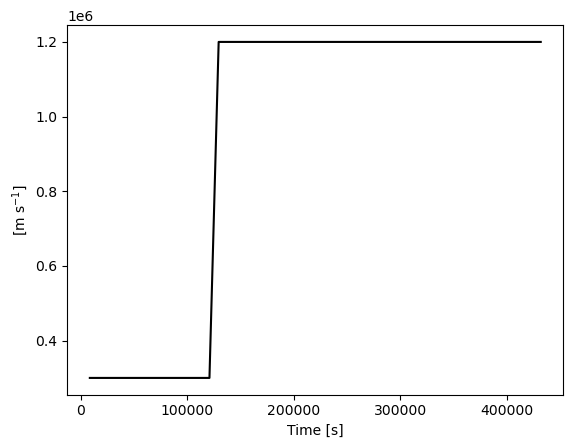

In [6]:
vr[:, (0.5, 'au')].plot('k')